### Importing the basic libraries and data from CSV file

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# Description about the dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
# Information about the features of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
# to check whether there is any null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Separating the features and labels 

In [65]:
# Sepearting the dataset to features and target varibales.

X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Splitting the targets and labels into training and testing dataset

In [66]:
# Splitting dataset into training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state = 1234)

In [67]:
X_train.shape

(614, 8)

In [68]:
X_test.shape

(154, 8)

### Normalising the data

In [69]:
# Scaling the the training and testing feature varibales

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train_sclaed = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

### Deep learning Model Design

In [70]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [71]:
DL_Model = Sequential()

In [72]:
DL_Model.add(Input(shape=X_train_sclaed.shape[1]))
DL_Model.add(Dense(units=128, activation='relu'))
DL_Model.add(Dense(units=64, activation='relu'))
DL_Model.add(Dense(units=32, activation='relu'))
DL_Model.add(Dense(units=1, activation='sigmoid'))

In [73]:
DL_Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [74]:
DL_Model.compile(optimizer='adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

### Training the model 

In [75]:
result = DL_Model.fit(X_train_sclaed, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 0.6117 - accuracy: 0.7020 - val_loss: 0.5562 - val_accuracy: 0.7727
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7655 - val_loss: 0.4981 - val_accuracy: 0.7922
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4710 - accuracy: 0.7671 - val_loss: 0.4689 - val_accuracy: 0.7922
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.7769 - val_loss: 0.4690 - val_accuracy: 0.7857
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4430 - accuracy: 0.7818 - val_loss: 0.4683 - val_accuracy: 0.7922
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4364 - accuracy: 0.7801 - val_loss: 0.4830 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4276 - accuracy: 0.7866 - val_loss: 0.4753 - val_accuracy: 0.7727
Epoch 8/100


### Prediction and Evaluation

In [76]:
y_pred = DL_Model.predict(X_test_scaled)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred>=0.5)

0.7467532467532467

In [78]:
confusion_matrix(y_test, y_pred>=0.5)

array([[83, 17],
       [22, 32]])

In [79]:
# To see the accuracy and loss in every epochs

history = pd.DataFrame(result.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.611672,0.701954,0.556202,0.772727
1,0.509760,0.765472,0.498140,0.792208
2,0.471002,0.767101,0.468880,0.792208
3,0.453493,0.776873,0.469047,0.785714
4,0.443014,0.781759,0.468341,0.792208


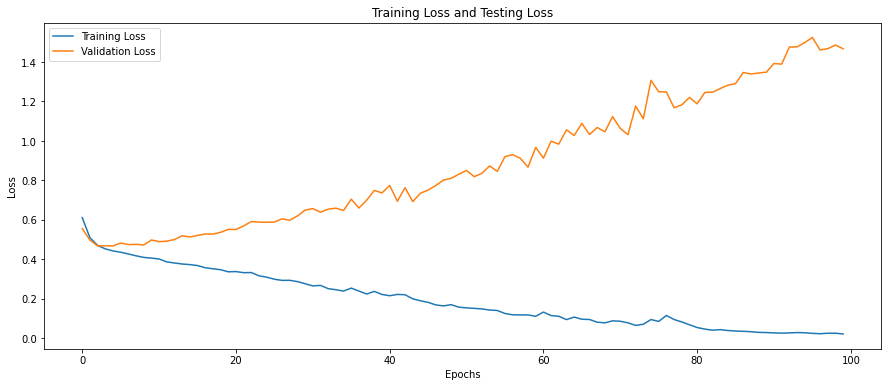

In [80]:
# plot graph for loss

plt.figure(figsize=(15,6))
plt.plot(history.loss, label='Training Loss')
plt.plot(history.val_loss, label='Validation Loss')
plt.title('Training Loss and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

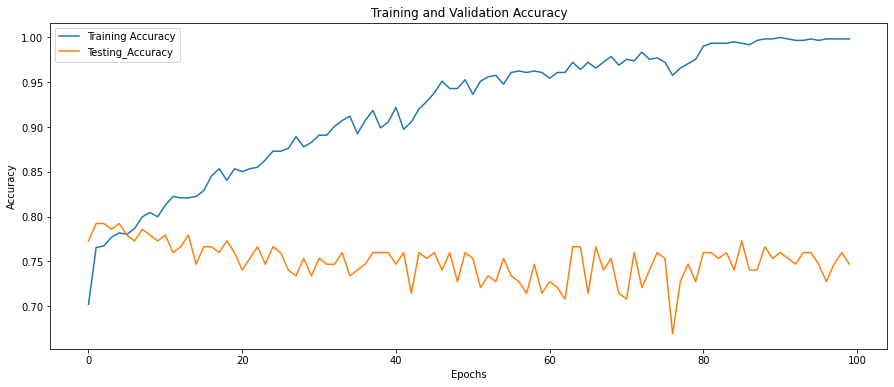

In [82]:
# Plot for Accuracy

plt.figure(figsize=(15,6))
plt.plot(history.accuracy, label = 'Training Accuracy')
plt.plot(history.val_accuracy, label = 'Testing_Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Removing the Overfitting Problem
#### L1 Regularization


In [84]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [88]:
model_L1 = Sequential()
model_L1.add(Input(X_train_sclaed.shape[1]))
model_L1.add(Dense(units=128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.L1()))
model_L1.add(Dense(units=64, activation='relu'))
model_L1.add(Dense(units=32, activation='relu'))
model_L1.add(Dense(units=1, activation='sigmoid'))

In [89]:
from sklearn import metrics
model_L1.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['Accuracy'])

In [91]:
from pandas.core.common import random_state
result_L1 = model_L1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6928 - Accuracy: 0.7248 - val_loss: 0.7519 - val_Accuracy: 0.7078
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6883 - Accuracy: 0.7362 - val_loss: 0.6953 - val_Accuracy: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7280 - Accuracy: 0.7231 - val_loss: 0.7219 - val_Accuracy: 0.7078
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.7145 - Accuracy: 0.7117 - val_loss: 0.7073 - val_Accuracy: 0.7273
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7036 - Accuracy: 0.7362 - val_loss: 0.6904 - val_Accuracy: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6774 - Accuracy: 0.7541 - val_loss: 0.6827 - val_Accuracy: 0.7143
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6723 - Accuracy: 0.7329 - val_loss: 0.6844 - val_Accuracy: 0.7532
Epoch 8/100
2

In [92]:
history_l1 = pd.DataFrame(result_L1.history)
history_l1.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.692788,0.724756,0.751934,0.707792
1,0.688251,0.736156,0.695297,0.701299
2,0.728000,0.723127,0.721859,0.707792
3,0.714484,0.711726,0.707270,0.727273
4,0.703573,0.736156,0.690449,0.753247


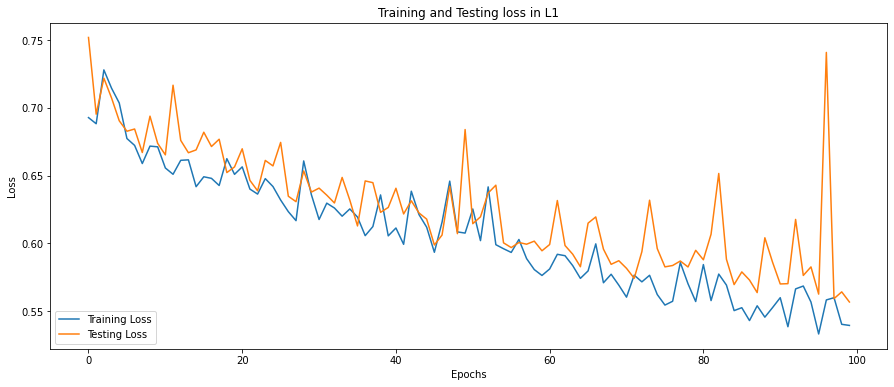

In [108]:
plt.figure(figsize=(15,6))
plt.plot(history_l1.loss, label = 'Training Loss')
plt.plot(history_l1.val_loss, label = 'Testing Loss')
plt.title('Training and Testing loss in L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

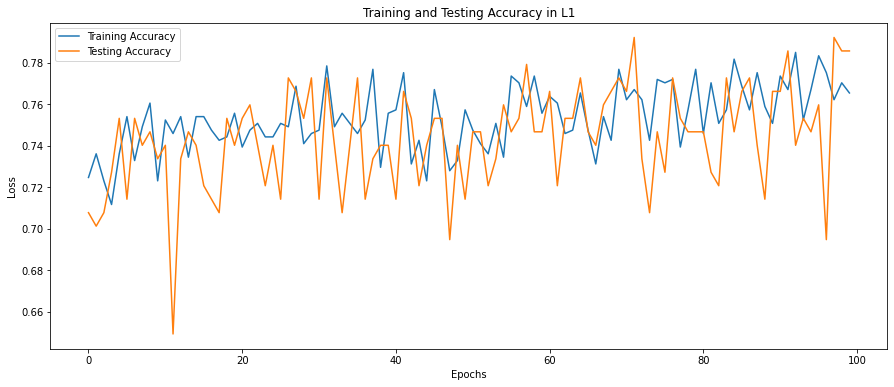

In [96]:
plt.figure(figsize=(15,6))
plt.plot(history_l1.Accuracy, label = 'Training Accuracy')
plt.plot(history_l1.val_Accuracy, label = 'Testing Accuracy')
plt.title('Training and Testing Accuracy in L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### L2 Regularization


In [101]:
model_L2 = Sequential()
model_L2.add(Input(X_train_sclaed.shape[1]))
model_L2.add(Dense(units=128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.L2()))
model_L2.add(Dense(units=64, activation='relu'))
model_L2.add(Dense(units=32, activation='relu'))
model_L2.add(Dense(units=1, activation='sigmoid'))

In [102]:
from sklearn import metrics
model_L2.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['Accuracy'])

In [103]:
result_L2 = model_L2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 1.6974 - Accuracy: 0.5537 - val_loss: 1.3469 - val_Accuracy: 0.6234
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1180 - Accuracy: 0.6091 - val_loss: 1.0105 - val_Accuracy: 0.5974
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8231 - Accuracy: 0.6205 - val_loss: 0.8649 - val_Accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7615 - Accuracy: 0.6694 - val_loss: 0.7588 - val_Accuracy: 0.6818
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7433 - Accuracy: 0.6808 - val_loss: 0.7397 - val_Accuracy: 0.6299
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7093 - Accuracy: 0.6954 - val_loss: 0.9227 - val_Accuracy: 0.5455
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7806 - Accuracy: 0.6710 - val_loss: 0.8287 - val_Accuracy: 0.6753
Epoch 8/100


In [105]:
history_l2 = pd.DataFrame(result_L2.history)
history_l2.head()

,loss,Accuracy,val_loss,val_Accuracy
0,1.697421,0.553746,1.346883,0.623377
1,1.117967,0.609121,1.010544,0.597403
2,0.823136,0.620521,0.864908,0.642857
3,0.761501,0.669381,0.758772,0.681818
4,0.743280,0.680782,0.739733,0.629870


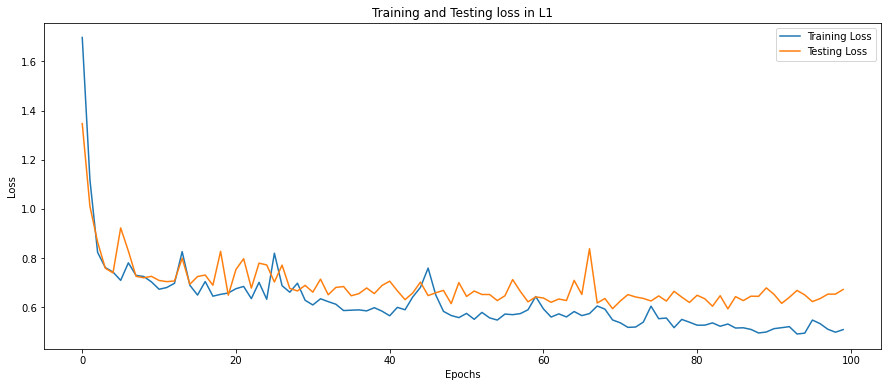

In [107]:
plt.figure(figsize=(15,6))
plt.plot(history_l2.loss, label = 'Training Loss')
plt.plot(history_l2.val_loss, label = 'Testing Loss')
plt.title('Training and Testing loss in L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

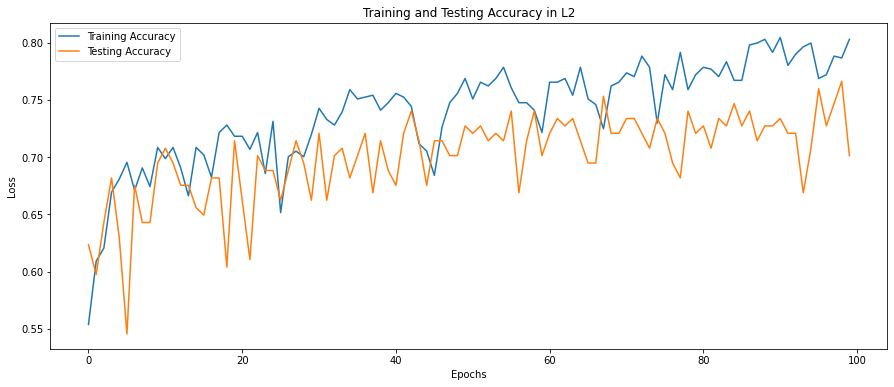

In [109]:
plt.figure(figsize=(15,6))
plt.plot(history_l2.Accuracy, label = 'Training Accuracy')
plt.plot(history_l2.val_Accuracy, label = 'Testing Accuracy')
plt.title('Training and Testing Accuracy in L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Drop out

In [111]:
model_DP = Sequential()
model_DP.add(Input(X_train_sclaed.shape[1]))
model_DP.add(Dense(units=128, activation='relu'))
model_DP.add(Dropout(0.50))
model_DP.add(Dense(units=64, activation='relu'))
model_DP.add(Dense(0.30))
model_DP.add(Dense(units=32, activation='relu'))
model_DP.add(Dense(units=1, activation='sigmoid'))

In [113]:
from sklearn import metrics
model_DP.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics = ['Accuracy'])

In [114]:
result_DP = model_DP.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 26ms/step - loss: 0.6918 - Accuracy: 0.6515 - val_loss: 0.6905 - val_Accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6893 - Accuracy: 0.6515 - val_loss: 0.6881 - val_Accuracy: 0.6494
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6867 - Accuracy: 0.6515 - val_loss: 0.6857 - val_Accuracy: 0.6494
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6844 - Accuracy: 0.6515 - val_loss: 0.6834 - val_Accuracy: 0.6494
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6823 - Accuracy: 0.6515 - val_loss: 0.6813 - val_Accuracy: 0.6494
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6803 - Accuracy: 0.6515 - val_loss: 0.6794 - val_Accuracy: 0.6494
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6783 - Accuracy: 0.6515 - val_loss: 0.6775 - val_Accuracy: 0.6494
Epoch 8/100


In [116]:
history_dp = pd.DataFrame(result_DP.history)
history_dp.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.691808,0.651466,0.690521,0.649351
1,0.689272,0.651466,0.688053,0.649351
2,0.686743,0.651466,0.685711,0.649351
3,0.684436,0.651466,0.683354,0.649351
4,0.682307,0.651466,0.681339,0.649351


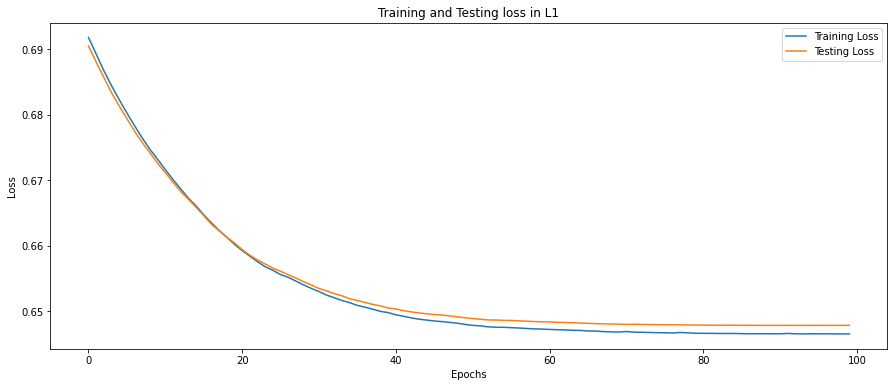

In [117]:
plt.figure(figsize=(15,6))
plt.plot(history_dp.loss, label = 'Training Loss')
plt.plot(history_dp.val_loss, label = 'Testing Loss')
plt.title('Training and Testing loss in L1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

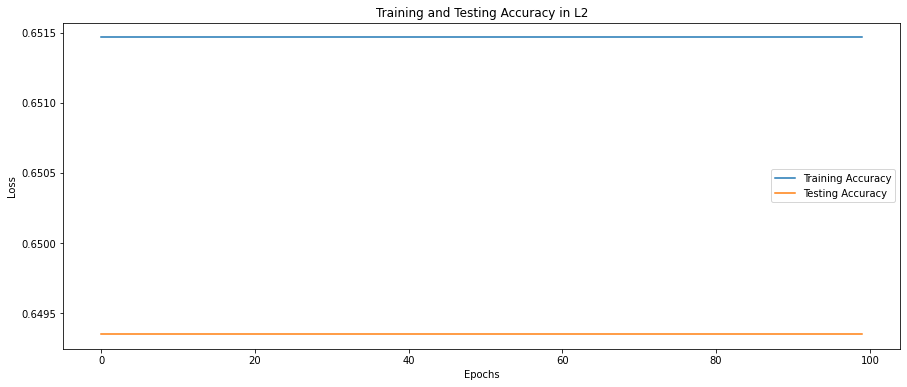

In [119]:
plt.figure(figsize=(15,6))
plt.plot(history_dp.Accuracy, label = 'Training Accuracy')
plt.plot(history_dp.val_Accuracy, label = 'Testing Accuracy')
plt.title('Training and Testing Accuracy in L2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()